   target               a         b   c                  d          e  \
0     0.0  lv hypertrophy  0.531368  63       fixed defect  Cleveland   
1     1.0  lv hypertrophy -1.056253  67             normal  Cleveland   
2     1.0  lv hypertrophy  0.438407  67  reversable defect  Cleveland   
3     0.0          normal -1.413430  37             normal  Cleveland   
4     0.0  lv hypertrophy -1.347216  41             normal  Cleveland   

          f                g      h      i  ...          r       s    t  \
0  0.285812   typical angina  233.0   True  ...  60.627689    Male  2.3   
1  1.660947     asymptomatic  286.0  False  ...  65.225088    Male  1.5   
2 -0.305235     asymptomatic  229.0  False  ...  66.956699    Male  2.6   
3  0.887054      non-anginal  250.0  False  ...  37.160246    Male  3.5   
4 -0.558037  atypical angina  204.0  False  ...  41.359067  Female  1.4   

           u      v         w    x          y   z      {  
0  62.306825  145.0 -1.007833  0.0  61.730527 NaN  

/Users/veronicacruz/Desktop/BINF5507 - Machine Learning and AI/Assignment1/Scripts/data_preprocessor.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace = True)


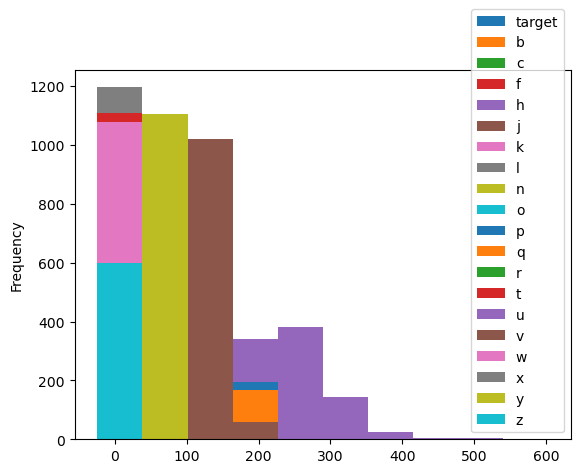

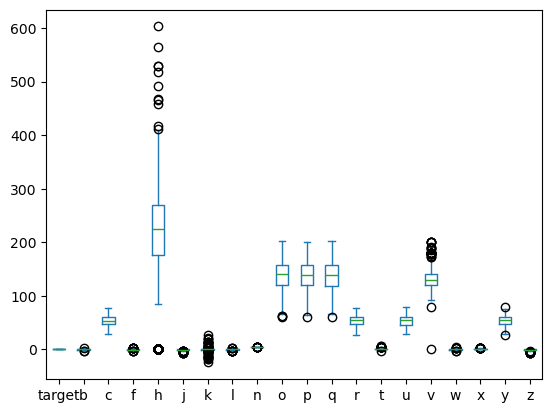

In [8]:
# Import necessary modules
import data_preprocessor as dp
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import scipy.stats as stats
import numpy as np
# 1. Load the dataset
messy_data = pd.read_csv('../Data/messy_data.csv')
clean_data = messy_data.copy()

#Examine data set before preprocessing
print(messy_data.head())
print(messy_data.info())
print(messy_data.describe(include="all"))

#Check for inconsistent formatting 
for col in messy_data.select_dtypes(include='object').columns:
    unique_vals = messy_data[col].unique()
    print(f"Column: {col}")
    print(unique_vals) 

#Check for Outliers 
outliers = np.abs(stats.zscore(messy_data.select_dtypes(include=[np.number]))) > 3
print(outliers.any())
#Use Visualizations 
messy_data.plot.hist()
messy_data.plot.box() 
#Drop unlabeled features 
clean_data = clean_data.dropna(subset=['target'])

# 2. Preprocess the data
clean_data = dp.impute_missing_values(clean_data, strategy='mean')
clean_data = dp.remove_duplicates(clean_data)
clean_data = dp.normalize_data(clean_data)
clean_data = dp.remove_redundant_features(clean_data)

#Examine data after preprocessing 
print(clean_data.head())
print(clean_data.info())
print(clean_data.describe(include="all"))
# 3. Save the cleaned dataset
clean_data.to_csv('../Data/clean_data.csv', index=False)

# 4. Train and evaluate the model
print("Messy Data Performance:")
dp.simple_model(messy_data)

print("\nClean Data Performance:")
dp.simple_model(clean_data)